In [6]:
import csv
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

In [2]:
reg_val = re.compile('\[(.*)\]')

In [3]:
x_pts = []
y_pts = []
z_pts = []
with open('../result/gtsam_result/result_1010_set6_56_58.txt') as inp_file:
    line = inp_file.readline()
    while line:
      if line.startswith('Value l'):
        csv_val = reg_val.search(line).group(1)
        row = csv_val.split(',')
        x_pts.append(float(row[0]))
        y_pts.append(float(row[1]))
        z_pts.append(float(row[2]))
      line = inp_file.readline()

In [12]:
def plot3dview_2_cameras(points_3d, camera_center_1, camera_center_2, R1, R2):
    """
    Visualize the actual 3D points and the estimated 3D camera center for 2 cameras.
    You do not need to modify anything in this function, although you can if you
    want to.
    """

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
    ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='blue',
        marker='o', s=10, depthshade=0)
    
    camera_center_1 = camera_center_1.squeeze()
    ax.scatter(camera_center_1[0],  camera_center_1[1], camera_center_1[2], c='red',
        marker='x', s=20, depthshade=0)
     
    camera_center_2 = camera_center_2.squeeze()
    ax.scatter(camera_center_2[0],  camera_center_2[1], camera_center_2[2], c='red',
        marker='x', s=20, depthshade=0)
 
    v1 = R1[:,0]*0.1
    v2 = R1[:,1]*0.1
    v3 = R1[:,2]*0.1

    cc0, cc1, cc2 = camera_center_1
    
    ax.plot3D([0, 0.05], [0, 0], [0, 0], c='k', ls=':')
    ax.plot3D([0, 0], [0, 0.05], [0, 0], c='g')
    ax.plot3D([0, 0], [0, 0], [0, 0.05], c='b')

    ax.plot3D([cc0, cc0+v1[0]], [cc1, cc1+v1[1]], [cc2, cc2+v1[2]], c='r')
    ax.plot3D([cc0, cc0+v2[0]], [cc1, cc1+v2[1]], [cc2, cc2+ v2[2]], c='g')
    ax.plot3D([cc0, cc0+v3[0]], [cc1, cc1+v3[1]], [cc2, cc2+v3[2]], c='b')

   
    v1 = R2[:,0]*0.1 
    v2 = R2[:,1]*0.1
    v3 = R2[:,2]*0.1

    cc0, cc1, cc2 = camera_center_2
    
    ax.plot3D([0, 0.1], [0, 0], [0, 0], c='r')
    ax.plot3D([0, 0], [0, 0.1], [0, 0], c='g')
    ax.plot3D([0, 0], [0, 0], [0, 0.1], c='b')

    ax.plot3D([cc0, cc0+v1[0]], [cc1, cc1+v1[1]], [cc2, cc2+v1[2]], c='r')
    ax.plot3D([cc0, cc0+v2[0]], [cc1, cc1+v2[1]], [cc2, cc2+ v2[2]], c='g')
    ax.plot3D([cc0, cc0+v3[0]], [cc1, cc1+v3[1]], [cc2, cc2+v3[2]], c='b')

    # draw vertical lines connecting each point to ground
#     min_z = min(points_3d[:, 2])
#     for p in points_3d:
#         x, y, z = p
#         ax.plot3D(xs=[x, x], ys=[y, y], zs=[z, min_z], c='black', linewidth=1)
    
#     x, y, z = camera_center_1
#     ax.plot3D(xs=[x, x], ys=[y, y], zs=[z, min_z], c='black', linewidth=1)
    
#     x, y, z = camera_center_2
#     ax.plot3D(xs=[x, x], ys=[y, y], zs=[z, min_z], c='black', linewidth=1)

<IPython.core.display.Javascript object>


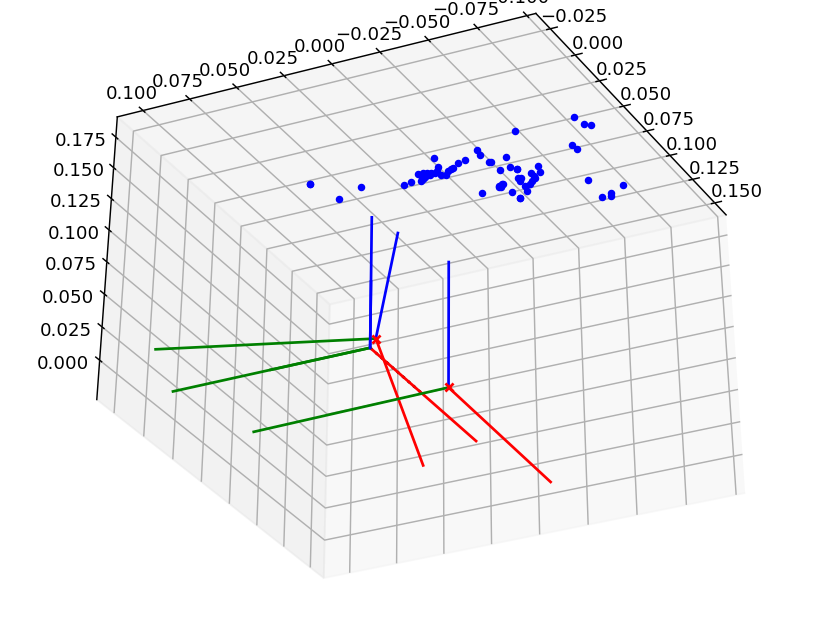

In [13]:
camera_center_1 = np.array([[-6.67840491404e-05, -0.00281600290947, 0.00591584292501]])
camera_R_1 = np.array([[0.940263006243, -0.264347162292,  0.214536842707], 
                       [ 0.268366263631,  0.963257321102, 0.0107182968891],
                       [-0.209487535751, 0.0474964328338,  0.976657084771]
                      ])
camera_center_2 = np.array([0.0500667840492, -0.0122921782013, 0.00197113447659])
camera_R_2 = np.array([[0.999403826205,  0.00328437528514,   0.0343686637109], 
                       [-0.00376834660112,    0.999894523239,   0.0140264735286],
                       [-0.0343189704126,  -0.0141476243497,    0.999310788992]
                      ])
temp = np.column_stack((x_pts, y_pts, z_pts))
plot3dview_2_cameras(temp, camera_center_1, camera_center_2, camera_R_1, camera_R_2)